In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# 航空乘客人数案例


In [2]:
# 读入数据
data = pd.read_csv('./data/airline-passengers.csv',parse_dates=[0])
data

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


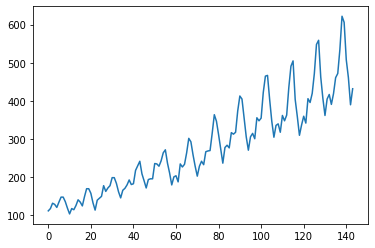

In [3]:
data = data.rename(columns={'Month':'ds','Passengers':'y'})
data.y.plot(x='ds',y='y')

In [4]:
# Create Training and Test
train_size= int(len(data)*0.85)
test_size= len(data) -train_size
train = data[:train_size]
test = data[train_size:]

In [5]:
from fbprophet import Prophet
m = Prophet()
m.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [6]:
train

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
117,1958-10-01,359
118,1958-11-01,310
119,1958-12-01,337
120,1959-01-01,360


In [7]:
m.make_future_dataframe?

In [8]:
# Python
forecast = m.predict(test)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
17,1960-08-01,515.665825,490.365922,540.124252
18,1960-09-01,476.001466,450.401766,500.460968
19,1960-10-01,443.386569,416.259690,467.585279
20,1960-11-01,414.887003,391.653027,440.996198
21,1960-12-01,441.018183,417.291265,466.330608


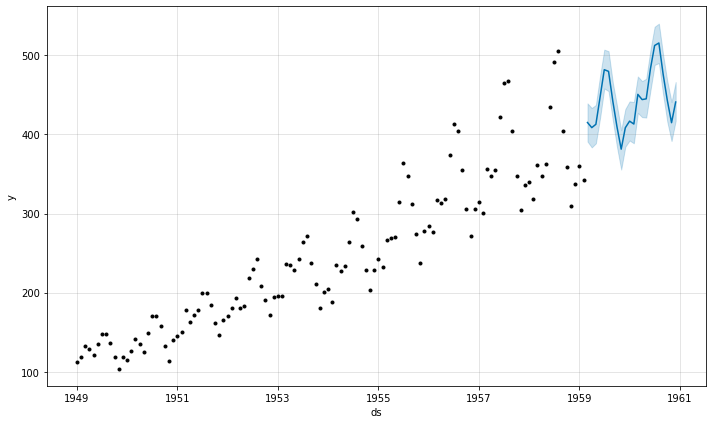

In [9]:
# Python
fig1 = m.plot(forecast)


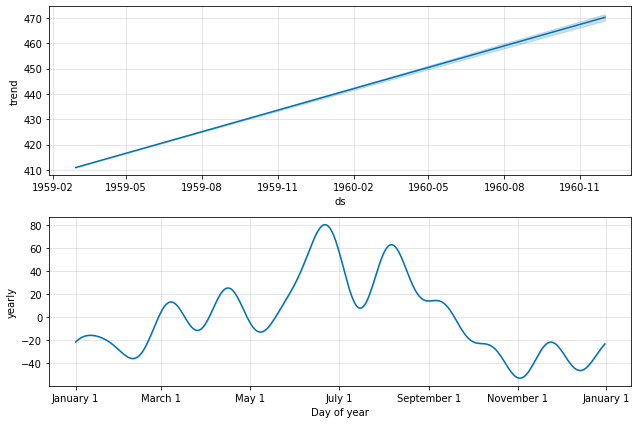

In [10]:
# Python
fig2 = m.plot_components(forecast)

122 122


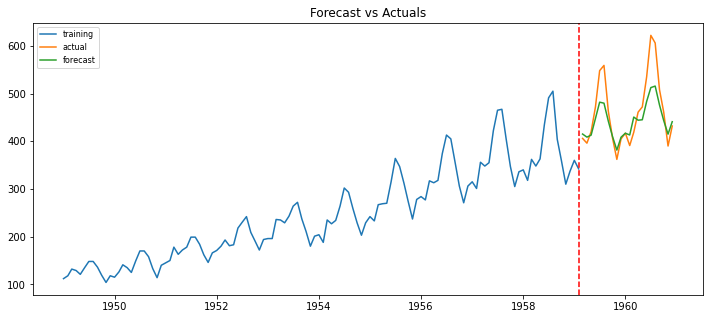

In [20]:
# Plot
plt.figure(figsize=(12,5))
plt.plot(train['ds'],train['y'], label='training')
plt.plot(test['ds'],test['y'] ,label='actual')
plt.plot(forecast['ds'],forecast['yhat'], label='forecast')
print(train_size,len(train['ds']))
plt.axvline(x=train['ds'][train_size-1], c='r', linestyle='--')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [12]:
from sklearn.metrics import mean_squared_error 
mse = mean_squared_error(test['y'], forecast['yhat'])
print('mse=',mse)

mse= 1805.1419374589627


# 某市上呼吸道感染病例数

In [22]:
# 读入数据
data = pd.read_csv('./data/上呼吸道感染.csv',parse_dates=[0])
data
df =data.rename(columns={'date':'ds','count':'y'})
df

,ds,y
0,2017-01-01,50
1,2017-01-02,18
2,2017-01-03,27
3,2017-01-04,33
4,2017-01-05,16
...,...,...
723,2018-12-27,43
724,2018-12-28,65
725,2018-12-29,67
726,2018-12-30,61


In [23]:
from fbprophet import Prophet
from fbprophet.make_holidays import make_holidays_df

# 获取节假日的时间
holidays= make_holidays_df([2017,2018,2019,2020],'China')
def holiday_lower_upper(holiday):
    if holiday == 'Chinese New Year':
        return [-3,8]
    elif holiday== 'National Day':
        return [-1,6]
    else:
        return [0,0]

holidays['lower_window'] = holidays['holiday'].map(lambda x: holiday_lower_upper(x)[0])
holidays['upper_window'] = holidays['holiday'].map(lambda x: holiday_lower_upper(x)[1])
holidays

,ds,holiday,lower_window,upper_window
0,2017-01-01,New Year's Day,0,0
1,2017-01-28,Chinese New Year,-3,8
2,2017-04-04,Tomb-Sweeping Day,0,0
3,2017-04-05,Tomb-Sweeping Day,0,0
4,2017-05-01,Labor Day,0,0
5,2017-05-30,Dragon Boat Festival,0,0
6,2017-10-04,Mid-Autumn Festival,0,0
7,2017-10-01,National Day,-1,6
8,2018-01-01,New Year's Day,0,0
9,2018-02-16,Chinese New Year,-3,8


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


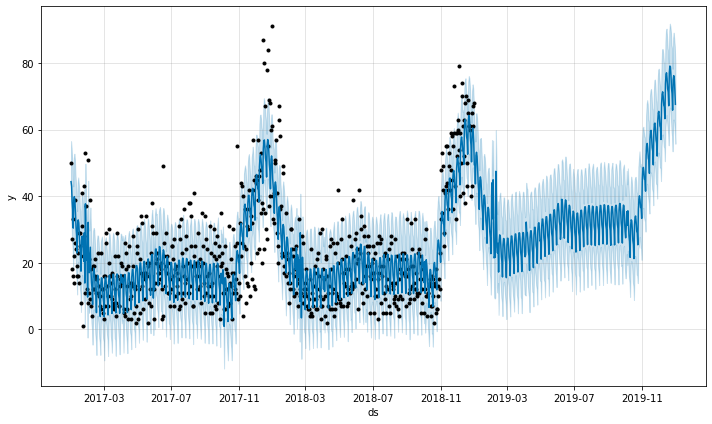

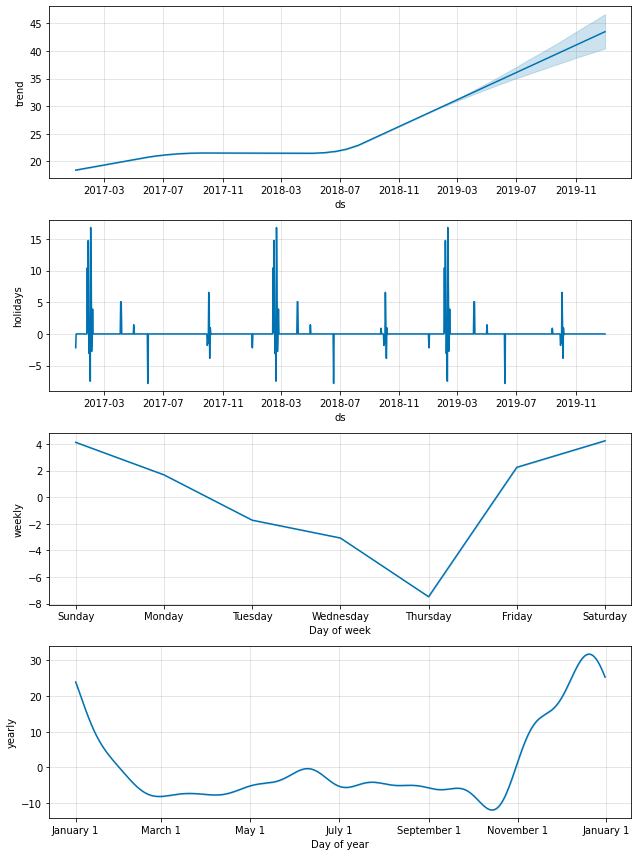

In [27]:
m = Prophet(holidays=holidays, holidays_prior_scale=10.0,weekly_seasonality=True,yearly_seasonality=True)
# m = Prophet()
m.add_seasonality(name='weekly', period=7, fourier_order=3, prior_scale=0.1)
m.fit(df)
# 计算预测值：periods 表示需要预测的点数，freq 表示时间序列的频率。
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
#画出预测图：
m.plot(forecast)
#画出时间序列的分量：
m.plot_components(forecast)
print('')